# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.611 ,  0.1272,  0.6644,  0.3869,  0.7528,  0.4505,  0.0213,  0.2505,  0.5459,  0.9374,
        0.1371,  0.4852,  0.6379,  0.0672,  0.4828,  0.128 ,  0.9666,  0.5042,  0.4402,  0.0837,
        0.1346,  0.6714,  0.9229,  0.8282,  0.3541,  0.5805,  0.8824,  0.7999,  0.5762,  0.6387])

In [6]:
y

array([  9.8331,   8.3817,   9.9933,   9.1608,  10.2584,   9.3516,   8.0638,   8.7515,   9.6378,
        10.8122,   8.4114,   9.4556,   9.9138,   8.2017,   9.4483,   8.384 ,  10.8998,   9.5127,
         9.3207,   8.2512,   8.4037,  10.0141,  10.7687,  10.4846,   9.0624,   9.7416,  10.6473,
        10.3998,   9.7286,   9.9161])

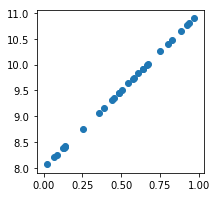

In [7]:
plt.scatter(x,y)

In [11]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [12]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.0787

In [13]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [14]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [15]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

RuntimeError: No MovieWriters available!